## Hayes equation
$$\dot{x}(t) = a \,x(t) + b \,x(t-1) + 1,$$
here 
$$ \mathbf{A}(t) \equiv \begin{bmatrix} a \end{bmatrix},
\quad \mathbf{B}_1(t) \equiv \begin{bmatrix}b\end{bmatrix},
\quad \tau_1(t) \equiv 1 , 
\quad \text{and} \quad \mathbf{c}(t) \equiv \begin{bmatrix} 1 \end{bmatrix}$$

(Page 13 of [1])

In [1]:
using SemiDiscretizationMethod

┌ Info: Recompiling stale cache file /home/henrik/.julia/compiled/v1.0/SemiDiscretizationMethod/jYxJM.ji for SemiDiscretizationMethod [a6865705-0aff-55fc-a8e1-34d7b6815716]
└ @ Base loading.jl:1190


In [2]:
function createHayesProblem(a,b)
    AMx =  ProportionalMX(a*ones(1,1));
    τ1=1. 
    BMx1 = DelayMX(τ1,b*ones(1,1));
    cVec = Additive(ones(1))
    LDDEProblem(AMx,[BMx1],cVec)
end

createHayesProblem (generic function with 1 method)

In [3]:
hayes_lddep=createHayesProblem(-1.,-1.); # LDDE problem for Hayes equation
method=SemiDiscretization(1,0.1) # 3rd order semi discretization with Δt=0.1
τmax=1. # the largest τ of the system
mapping=DiscreteMapping(hayes_lddep,method,τmax,n_steps=1,calculate_additive=true); #The discrete mapping of the system

In [4]:
@show spectralRadiusOfMapping(mapping); # spectral radius ρ of the mapping matrix (ρ>1 unstable, ρ<1 stable)
@show fixPointOfMapping(mapping); # stationary solution of the hayes equation (equilibrium position)

spectralRadiusOfMapping(mapping) = 0.9411893741665636
fixPointOfMapping(mapping) = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


### Stability borders of the Hayes Equation

In [5]:
using MDBM

using Plots
gr();
using LaTeXStrings

In [6]:
method=SemiDiscretization(4,0.1);
τmax=1.

foo(a,b) = log(spectralRadiusOfMapping(DiscreteMapping(createHayesProblem(a,b),method,τmax,
    n_steps=1))); # No additive term calculated

axis=[Axis(-15.0:15.,:a),
    Axis(-15.0:15.,:b)]

iteration=3;
stab_border_points=getinterpolatedsolution(solve!(MDBM_Problem(foo,axis),iteration));

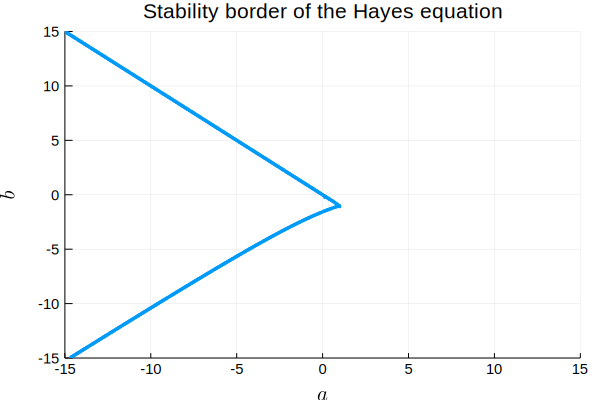

In [7]:
scatter(stab_border_points...,xlim=(-15.,15.),ylim=(-15.,15.),
    label="",title="Stability border of the Hayes equation",xlabel=L"a",ylabel=L"b",
    guidefontsize=14,tickfont = font(10),markersize=2,markerstrokewidth=0)

## Delay Mathieu equation
$$\ddot{x}(t) + a_1 \,\dot{x}(t)+(\delta + \varepsilon \cos(t))x(t)= b_0 \,x(t-2\pi) + \sin(2t)$$

here 
$$ \mathbf{x}(t) = \begin{bmatrix}x(t) \\ \dot{x}(t)\end{bmatrix}, \quad
\mathbf{A}(t) = \begin{bmatrix} 0 & 1 \\ -\delta - \varepsilon \cos(t) & -a_1 \end{bmatrix},
\quad \mathbf{B}_1(t) = \begin{bmatrix}0 & 0 \\ b_0 & 0\end{bmatrix},
\quad \tau_1(t) \equiv 2\pi, 
\quad \text{and} \quad \mathbf{c}(t) = \begin{bmatrix} 0 \\ \sin(2t) \end{bmatrix}$$

(Page 77 of [1])

In [8]:
function createMathieuProblem(δ,ε,b0,a1;T=2π)
    AMx =  ProportionalMX(t->@SMatrix [0. 1.; -δ-ε*cos(2π/T*t) -a1]);
    τ1=2π # if function is needed, the use τ1 = t->foo(t)
    BMx1 = DelayMX(τ1,t->@SMatrix [0. 0.; b0 0.]);
    cVec = Additive(t->@SVector [0.,sin(4π/T*t)])
    LDDEProblem(AMx,[BMx1],cVec)
end;

In [9]:
τmax=2π # the largest τ of the system
P=2π #Principle period of the system (sin(t)=sin(t+P)) 
mathieu_lddep=createMathieuProblem(3.,2.,-0.15,0.1,T=P); # LDDE problem for Hayes equation
method=SemiDiscretization(1,0.01) # 3rd order semi discretization with Δt=0.1
# if P = τmax, then n_steps is automatically calculated
mapping=DiscreteMapping(mathieu_lddep,method,τmax,
    n_steps=Int((P+100eps(P))÷method.Δt),calculate_additive=true); #The discrete mapping of the system

In [10]:
@show spectralRadiusOfMapping(mapping); # spectral radius ρ of the mapping matrix (ρ>1 unstable, ρ<1 stable)
fp=fixPointOfMapping(mapping); # stationary solution of the hayes equation (equilibrium position)

spectralRadiusOfMapping(mapping) = 0.5131596340374612


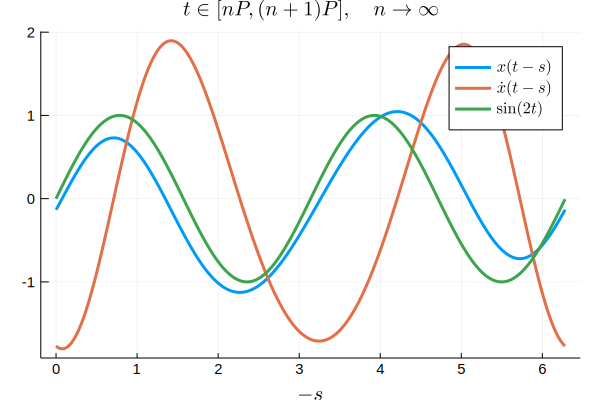

In [11]:
plot(0.0:method.Δt:P,fp[1:2:end],
    xlabel=L"-s",title=L"t \in [nP,(n+1)P],\quad n \to \infty",guidefontsize=14,linewidth=3,
    label=L"x(t-s)",legendfontsize=11,tickfont = font(10))

plot!(0.0:method.Δt:P,fp[2:2:end],
    xlabel=L"-s",linewidth=3,
    label=L"\dot{x}(t-s)")

plot!(0.0:method.Δt:P,sin.(2*(0.0:method.Δt:P)),linewidth=3,label=L"\sin(2t)")

### Stability Chart of the delayed Mathieu equation

In [12]:
a1=0.1;
ε=1;
τmax=2π;
T=1π;
method=SemiDiscretization(2,T/40);

foo(δ,b0) = log(spectralRadiusOfMapping(DiscreteMapping(createMathieuProblem(δ,ε,b0,a1,T=T),method,τmax,
    n_steps=Int((T+100eps(T))÷method.Δt)))); # No additive term calculated

axis=[Axis(-1:0.2:5.,:δ),
    Axis(-2:0.2:1.5,:b0)]

iteration=3;
stab_border_points=getinterpolatedsolution(solve!(MDBM_Problem(foo,axis),iteration));

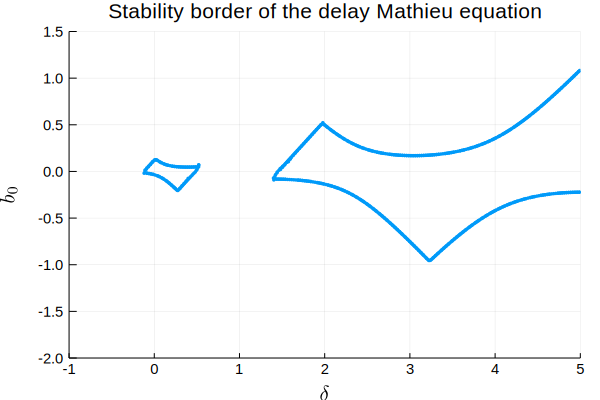

In [13]:
scatter(stab_border_points...,xlim=(-1.,5),ylim=(-2.,1.5),
    label="",title="Stability border of the delay Mathieu equation",xlabel=L"\delta",ylabel=L"b_0",
    guidefontsize=14,tickfont = font(10),markersize=2,markerstrokewidth=0)